In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel

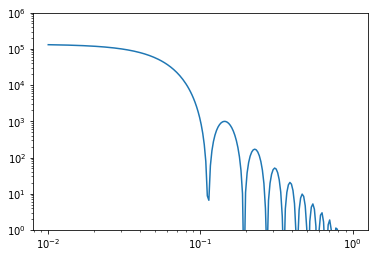

In [2]:
# Spherical micelle in sasmodels
model = load_model("./models/spherical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
sphere_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40.0,
         'rg': 10.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0,
         }
Iq = call_kernel(kernel, sphere_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()

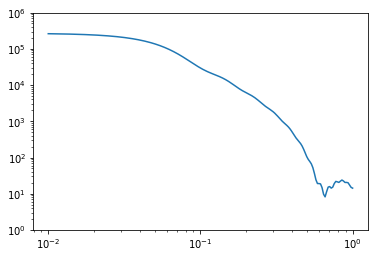

In [3]:
# Cylindrical micelle in sasmodels
model = load_model("./models/cylindrical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
cylinder_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40.0,
         'rg': 10.0,
         'length_core': 100.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0,
         'background':0.0,
         'scale':1.0,
         }
Iq = call_kernel(kernel, cylinder_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()

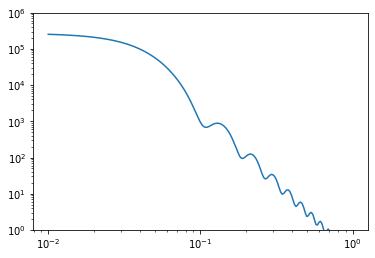

In [4]:
# Ellipsoidal micelle in sasmodels
model = load_model("./models/ellipsoidal_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
ellipsoid_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40,
         'rg': 10,
         'eps': 2.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0
         }
Iq = call_kernel(kernel, ellipsoid_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()

## Current issues:
1. Polydispersity doesn't seem to work
2. Cylindrical core is broken but the notebook works